In [355]:
import pandas as pd
import os
import json, requests
import seaborn as sns

In [356]:
# 데이터의 주소와 인증키 원하는 파일타입을 가져옵니다.
url = "http://openapi.seoul.go.kr:8088/(인증키)/xml/BukChonInOutPeopleInfo/1/5/"
key = '66484a6467636b7337357341525847'
file_type = 'json'
start_value = 50
end_value = 100

In [357]:
# openapi url을 만들어줍니다.
url = f"http://openapi.seoul.go.kr:8088/{key}/{file_type}/BukChonInOutPeopleInfo/{start_value}/{end_value}/"
url

'http://openapi.seoul.go.kr:8088/66484a6467636b7337357341525847/json/BukChonInOutPeopleInfo/50/100/'

In [358]:
# url에서 데이터를 가져와 문자열로 저장합니다.
response = requests.get(url)
print(type(response))
text = response.text
print(type(text))

<class 'requests.models.Response'>
<class 'str'>


In [359]:
# json 데이터를 가져옵니다.
data = json.loads(text)
# 타입 확인
print(type(data))
# 데이터 확인
data

<class 'dict'>


{'BukChonInOutPeopleInfo': {'list_total_count': 29318,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'DEVICEID': 1.0,
    'DEVICENAME': '율곡로3길 50',
    'DESCRIPTION': '덕성여고 앞',
    'STARTTIME': '2022-12-04 06:00:41',
    'ENDTIME': '2022-12-04 06:10:41',
    'INCOUNT': 177.0,
    'OUTCOUNT': 129.0},
   {'DEVICEID': 2.0,
    'DEVICENAME': '계동길 69',
    'DESCRIPTION': '계동교회 앞',
    'STARTTIME': '2022-12-01 00:20:40',
    'ENDTIME': '2022-12-01 00:30:40',
    'INCOUNT': 161.0,
    'OUTCOUNT': 162.0},
   {'DEVICEID': 1.0,
    'DEVICENAME': '율곡로3길 50',
    'DESCRIPTION': '덕성여고 앞',
    'STARTTIME': '2022-12-01 00:20:40',
    'ENDTIME': '2022-12-01 00:30:40',
    'INCOUNT': 44.0,
    'OUTCOUNT': 23.0},
   {'DEVICEID': 2.0,
    'DEVICENAME': '계동길 69',
    'DESCRIPTION': '계동교회 앞',
    'STARTTIME': '2022-12-02 11:50:42',
    'ENDTIME': '2022-12-02 12:00:42',
    'INCOUNT': 3781.0,
    'OUTCOUNT': 4852.0},
   {'DEVICEID': 1.0,
    'DEVICENAME': '율곡로3길 50',
    'DESCRIPTION

In [360]:
# 가져온 데이터를 이용하여 데이터프레임을 만듭니다.
df = pd.DataFrame(data['BukChonInOutPeopleInfo']['row'])
# 데이터프레임을 확인합니다.
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,1.0,율곡로3길 50,덕성여고 앞,2022-12-04 06:00:41,2022-12-04 06:10:41,177.0,129.0
1,2.0,계동길 69,계동교회 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,161.0,162.0
2,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,44.0,23.0
3,2.0,계동길 69,계동교회 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,3781.0,4852.0
4,1.0,율곡로3길 50,덕성여고 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,2574.0,741.0


In [361]:
# 날짜 열을 만들어줍니다.
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])
df['DATE'] = df['ENDTIME'].dt.date
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE
0,1.0,율곡로3길 50,덕성여고 앞,2022-12-04 06:00:41,2022-12-04 06:10:41,177.0,129.0,2022-12-04
1,2.0,계동길 69,계동교회 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,161.0,162.0,2022-12-01
2,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,44.0,23.0,2022-12-01
3,2.0,계동길 69,계동교회 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,3781.0,4852.0,2022-12-02
4,1.0,율곡로3길 50,덕성여고 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,2574.0,741.0,2022-12-02


In [362]:
# 시간 열을 만들어줍니다.
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])
df['HOUR'] = df['ENDTIME'].dt.hour
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR
0,1.0,율곡로3길 50,덕성여고 앞,2022-12-04 06:00:41,2022-12-04 06:10:41,177.0,129.0,2022-12-04,6
1,2.0,계동길 69,계동교회 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,161.0,162.0,2022-12-01,0
2,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,44.0,23.0,2022-12-01,0
3,2.0,계동길 69,계동교회 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,3781.0,4852.0,2022-12-02,12
4,1.0,율곡로3길 50,덕성여고 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,2574.0,741.0,2022-12-02,12


In [363]:
# 유동인구 총합비교하기
df['COUNT_SUM'] = df['INCOUNT'] + df['OUTCOUNT']
df.head()

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR,COUNT_SUM
0,1.0,율곡로3길 50,덕성여고 앞,2022-12-04 06:00:41,2022-12-04 06:10:41,177.0,129.0,2022-12-04,6,306.0
1,2.0,계동길 69,계동교회 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,161.0,162.0,2022-12-01,0,323.0
2,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,44.0,23.0,2022-12-01,0,67.0
3,2.0,계동길 69,계동교회 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,3781.0,4852.0,2022-12-02,12,8633.0
4,1.0,율곡로3길 50,덕성여고 앞,2022-12-02 11:50:42,2022-12-02 12:00:42,2574.0,741.0,2022-12-02,12,3315.0


C:\Users\이찬우\AppData\Local\Temp\ipykernel_26436\1758017754.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df.loc[df['DESCRIPTION'] == '계동교회 앞'], x = 'DATE', y = 'COUNT_SUM', ci=None)


<AxesSubplot: xlabel='DATE', ylabel='COUNT_SUM'>

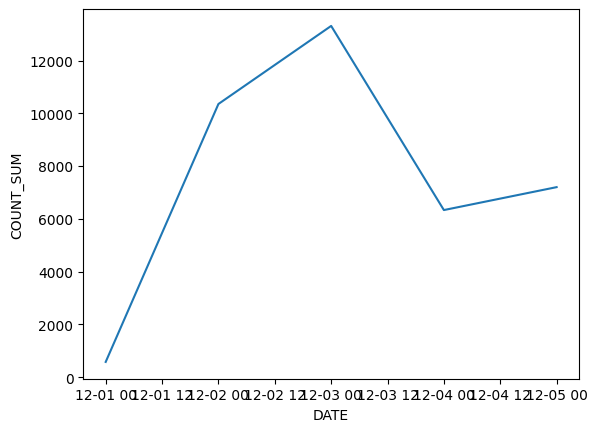

In [364]:
# 날짜별 COUNT_SUM을 확인합니다.
sns.lineplot(data = df.loc[df['DESCRIPTION'] == '계동교회 앞'], x = 'DATE', y = 'COUNT_SUM', ci=None)

In [365]:
# 계동교회 앞의 유동인구가 가장 많았던 행을 찾습니다. 
df.loc[df.loc[df['DESCRIPTION'] == '계동교회 앞', 'COUNT_SUM'].max() == df['COUNT_SUM']]
# 2022-11-30 23:40경에 유동인구가 가장 많았던 것을 볼 수 있습니다.

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR,COUNT_SUM
37,2.0,계동길 69,계동교회 앞,2022-12-03 12:30:41,2022-12-03 12:40:41,5935.0,7461.0,2022-12-03,12,13396.0


In [366]:
# 계동교회 앞의 유동인구가 가장 적었던 행을 찾습니다.
df.loc[df.loc[df['DESCRIPTION'] == '계동교회 앞', 'COUNT_SUM'].min() == df['COUNT_SUM']]
# 2023-01-21 00:00경에 유동인구가 가장 적었던 것을 볼 수 있습니다.

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR,COUNT_SUM
1,2.0,계동길 69,계동교회 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,161.0,162.0,2022-12-01,0,323.0


In [367]:
# 덕성여고 앞의 유동인구가 가장 많았던 행을 찾습니다. 
df.loc[df.loc[df['DESCRIPTION'] == '덕성여고 앞', 'COUNT_SUM'].max() == df['COUNT_SUM']]
# 2022-11-30 23:30~40경에 유동인구가 가장 많았던 것을 볼 수 있습니다.

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR,COUNT_SUM
46,1.0,율곡로3길 50,덕성여고 앞,2022-12-05 18:50:41,2022-12-05 19:00:41,6094.0,4470.0,2022-12-05,19,10564.0


In [368]:
# 덕성여고 앞의 유동인구가 가장 적었던 행을 찾습니다. 
df.loc[df.loc[df['DESCRIPTION'] == '덕성여고 앞', 'COUNT_SUM'].min() == df['COUNT_SUM']]
# 2023-01-03 00:00~10경에 유동인구가 가장 많았던 것을 볼 수 있습니다.

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,DATE,HOUR,COUNT_SUM
2,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 00:20:40,2022-12-01 00:30:40,44.0,23.0,2022-12-01,0,67.0


In [369]:
# DATE별로 유동인구의 합을 구합니다.
df_mpg = df.groupby('DATE', as_index=False).agg(n=('COUNT_SUM', 'sum'))
df_mpg

,DATE,n
0,2022-12-01,7726.0
1,2022-12-02,98989.0
2,2022-12-03,46826.0
3,2022-12-04,21052.0
4,2022-12-05,26678.0


<AxesSubplot: xlabel='DATE', ylabel='n'>

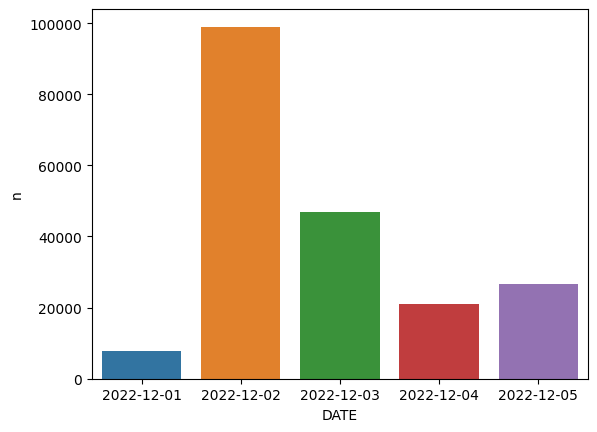

In [370]:
# 그룹화한 데이터를 그래프로 표현합니다.
sns.barplot(data = df_mpg, x = 'DATE', y = 'n')
# 12월 2일에 유동인구가 많은 것을 볼 수 있습니다.

In [371]:
# 시간대별로 유동인구의 평균을 구합니다.
df_mpg = df.groupby('HOUR', as_index=False).agg(n=('COUNT_SUM', 'mean'))
df_mpg

,HOUR,n
0,0,246.500000
1,1,378.333333
2,2,426.750000
3,6,343.666667
4,8,1584.000000
5,12,7190.055556
6,13,8197.000000
7,19,11755.000000
8,20,10010.500000


<AxesSubplot: xlabel='HOUR', ylabel='n'>

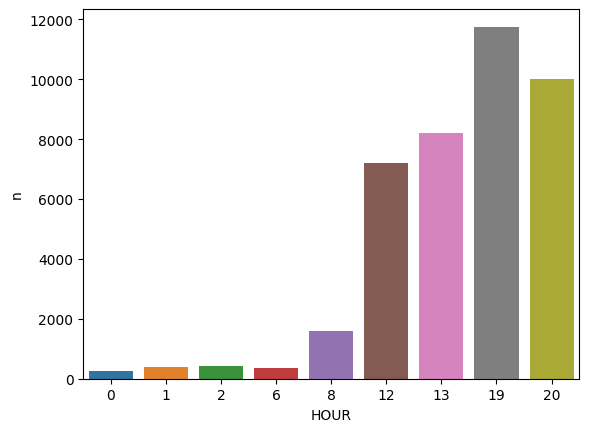

In [372]:
# 시간대별 유동인구 평균 그래프로 표현합니다.
sns.barplot(data = df_mpg, x = 'HOUR', y = 'n')
# 평균적으로 19시에 유동인구가 많은 것을 볼 수 있습니다.